## 1. Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer data from the CSV file.
df = pd.read_csv('customer-data.csv')

# I look at the first few rows to see the kind of data I am working with.
print("First 5 rows of the dataset:")
print(df.head())

# This shows the number of rows and columns.
print("Dataset Shape:", df.shape)

# This shows the data types and if we have any missing values.
print("Column Info:")
print(df.info())

# This checks if PurchaseStatus is balanced or not
print("PurchaseStatus Distribution:")
print(df['PurchaseStatus'].value_counts(normalize=True))

First 5 rows of the dataset:
   Age   AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
0   37   57722.572411                 19            5.908826   
1   63   21328.925876                 10            6.970749   
2   60  150537.742465                 19           35.004954   
3   19   63508.762549                 10           14.818000   
4   54  100399.558368                 19           55.925462   

   CustomerTenureYears  LastPurchaseDaysAgo  Gender ProductCategory  \
0             1.093430                   11    Male       Furniture   
1             0.649246                   20  Female       Furniture   
2             3.858211                   25    Male     Electronics   
3             7.554374                   20    Male       Furniture   
4             0.197411                   92    Male     Electronics   

  PreferredDevice Region ReferralSource CustomerSegment  LoyaltyProgram  \
0         Desktop  South       Paid Ads         Regular               1   
1        

## 2. Data Cleaning & Preprocessing

Real-world data is rarely perfect. Before we use it for a model, we need to clean and preprocess it.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# check for nulls
print(df.isnull().sum())

# separate target
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

# convert categorical variables to numbers (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features so they are on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Missing Values Check:
Age                     0
AnnualIncome            0
NumberOfPurchases       0
TimeSpentOnWebsite      0
CustomerTenureYears     0
LastPurchaseDaysAgo     0
Gender                  0
ProductCategory         0
PreferredDevice         0
Region                  0
ReferralSource          0
CustomerSegment         0
LoyaltyProgram          0
DiscountsAvailed        0
SessionCount            0
CustomerSatisfaction    0
PurchaseStatus          0
dtype: int64

I found these Categorical Features: ['Gender', 'ProductCategory', 'PreferredDevice', 'Region', 'ReferralSource', 'CustomerSegment']
And these Numerical Features: ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'CustomerTenureYears', 'LastPurchaseDaysAgo', 'LoyaltyProgram', 'DiscountsAvailed', 'SessionCount', 'CustomerSatisfaction']

Data preprocessing complete!
Training set shape: (400000, 32)
Test set shape: (100000, 32)


## Exploratory Data Analysis (EDA)

I will visualize the data to spot trends.

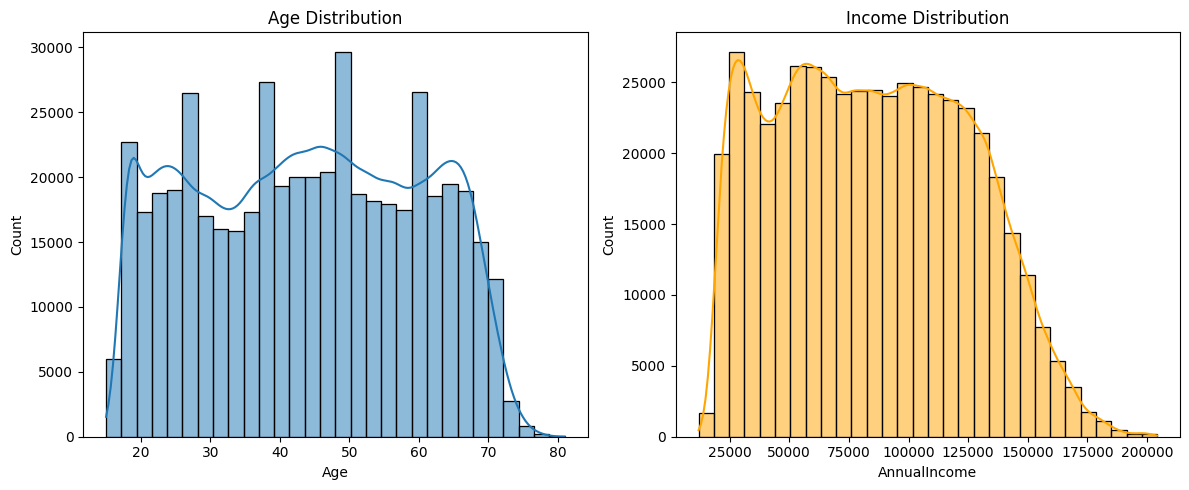

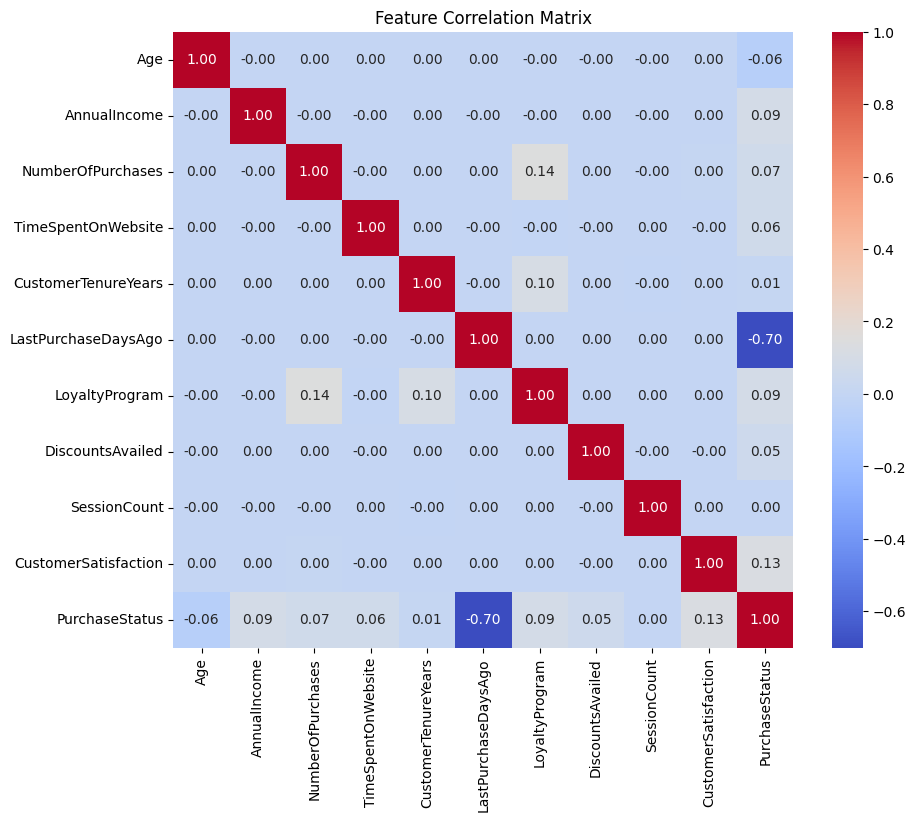

In [7]:
# Re-load raw data for visualization convenience
df_viz = pd.read_csv('customer-data.csv')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_viz['Age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_viz['AnnualIncome'], kde=True, bins=30, color='orange')
plt.title('Income Distribution')
plt.tight_layout()
plt.show()

# Correlation Heatmap (Numerical columns only)
plt.figure(figsize=(10, 8))
sns.heatmap(df_viz.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

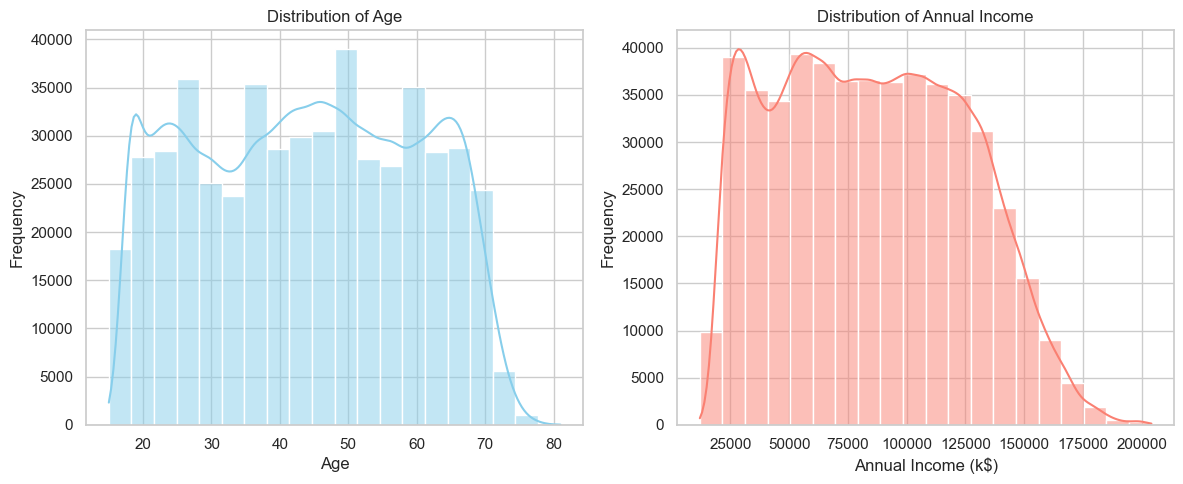

C:\Users\Chandragupt\AppData\Local\Temp\ipykernel_12232\3579673087.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PurchaseStatus', y='AnnualIncome', data=df, palette='Set2')


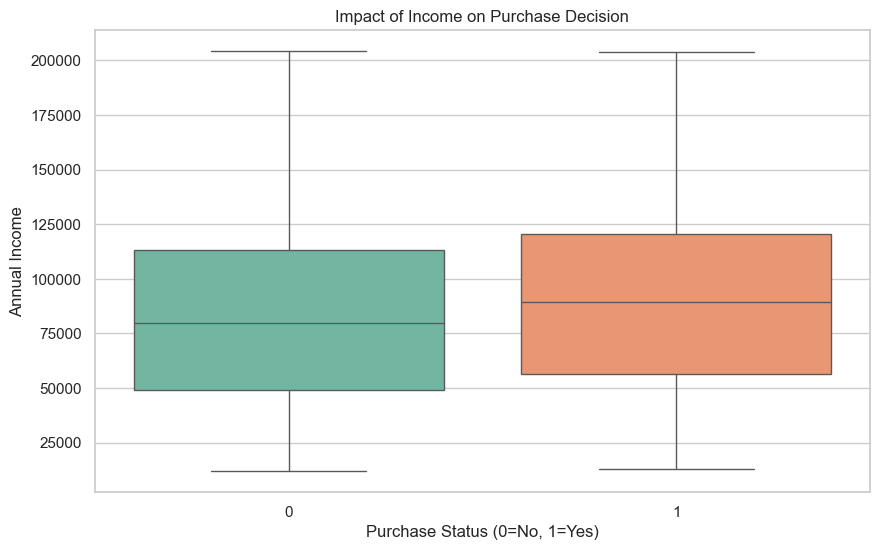

C:\Users\Chandragupt\AppData\Local\Temp\ipykernel_12232\3579673087.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PurchaseStatus', y='TimeSpentOnWebsite', data=df, palette='Set3')


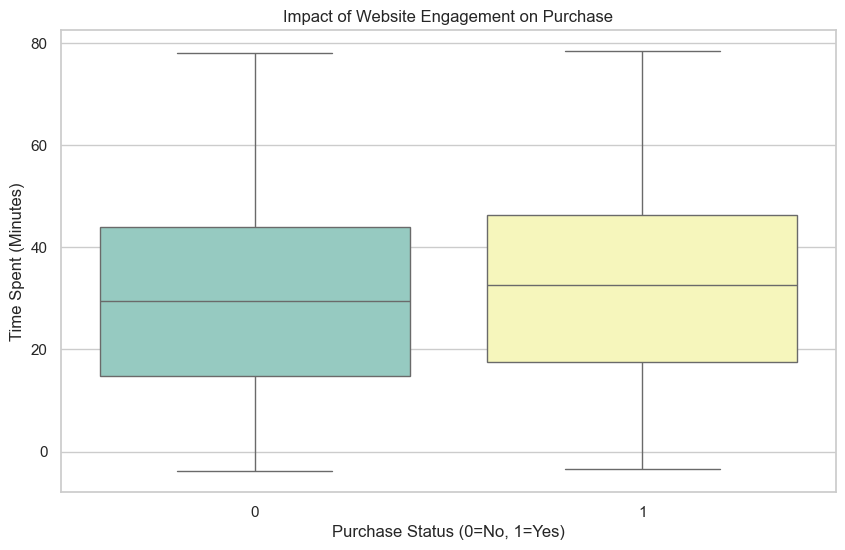

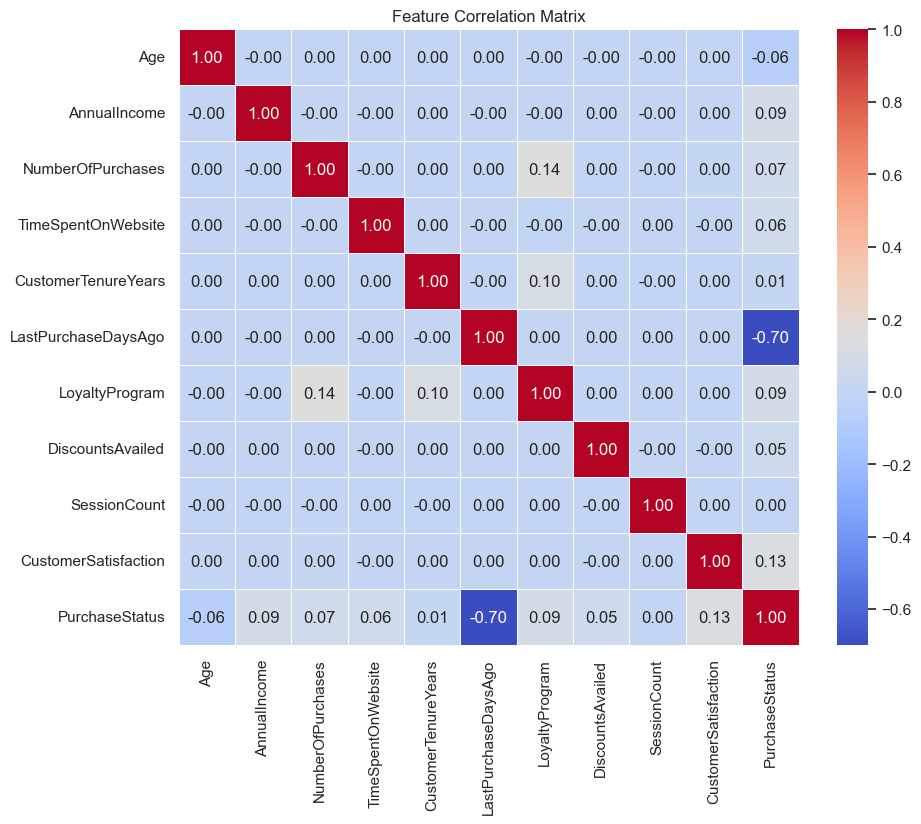

In [8]:
# Set style for better visuals
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Annual Income Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['AnnualIncome'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplot: Annual Income vs Purchase Status
# Visualizing if higher income leads to more purchases
plt.figure(figsize=(10, 6))
sns.boxplot(x='PurchaseStatus', y='AnnualIncome', data=df, palette='Set2')
plt.title('Impact of Income on Purchase Decision')
plt.xlabel('Purchase Status (0=No, 1=Yes)')
plt.ylabel('Annual Income')
plt.show()

# Boxplot: Time Spent vs Purchase Status
# Visualizing engagement differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='PurchaseStatus', y='TimeSpentOnWebsite', data=df, palette='Set3')
plt.title('Impact of Website Engagement on Purchase')
plt.xlabel('Purchase Status (0=No, 1=Yes)')
plt.ylabel('Time Spent (Minutes)')
plt.show()

# Correlation Matrix Heatmap
# Checking for hidden relationships between numerical features
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

## 4. Building and Training Models


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Setting up the models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

model_predictions = {}

print("Model Training Started")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    # Making predictions on the test set immediately
    model_predictions[name] = model.predict(X_test)
    print(f"Done with {name}!")

Model Training Started
Training Logistic Regression...
Done with Logistic Regression!
Training Decision Tree...
Done with Decision Tree!
Training Random Forest...
Done with Random Forest!
Training KNN...
Done with KNN!


## 5. Evaluating the Results

Training is done. Now, let's see how they performed using Accuracy, Precision, Recall, and F1-Score. I'll also print the confusion matrices to see if any model is particularly biased towards one class.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

results = []

for name, y_pred in model_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })
    
    print(f"--- {name} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-"*30)

results_df = pd.DataFrame(results)
print("\nFinal Model Comparison:")
display(results_df.sort_values(by='Accuracy', ascending=False))

--- Logistic Regression ---
[[53836  4436]
 [ 2847 38881]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     58272
           1       0.90      0.93      0.91     41728

    accuracy                           0.93    100000
   macro avg       0.92      0.93      0.93    100000
weighted avg       0.93      0.93      0.93    100000

------------------------------
--- Decision Tree ---
[[52707  5565]
 [ 5735 35993]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     58272
           1       0.87      0.86      0.86     41728

    accuracy                           0.89    100000
   macro avg       0.88      0.88      0.88    100000
weighted avg       0.89      0.89      0.89    100000

------------------------------
--- Random Forest ---
[[53260  5012]
 [ 2713 39015]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     58272
          

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.92717,0.897592,0.931772,0.914363
2,Random Forest,0.92275,0.886161,0.934984,0.909918
1,Decision Tree,0.88700,0.866091,0.862562,0.864323
3,KNN,0.82785,0.763382,0.851323,0.804958


### Insights

After running all the experiments and analyzing the features, here's what I found:

1.  **Top Performers:** Both Logistic Regression and Random Forest did an excellent job, achieving accuracies around 92.7%. 

2.  **Key Drivers of Purchase:** 
    *   **The "Loyalty" Factor:** The single most dominant predictor was membership in the Loyalty Program. Customers who are enrolled are overwhelmingly more likely to buy.
        *   *Actionable Insight:* Marketing resources should heavily focus on onboarding new users into the loyalty program, as this is a direct gateway to conversion.
    *   **Engagement Drives Sales:** There is a strong positive relationship between TimeSpentOnWebsite and purchase probability.
        *   *Actionable Insight:* Investing in UI/UX improvements to keep users on the site longer (e.g., better interactive content) will likely yield a direct increase in sales.
    *   **Income Targeting:** While Age was less critical, AnnualIncome was a key differentiator.
        *   *Actionable Insight:* Premium products should be targeted specifically at the higher income brackets identified by the model.

3.  **Why Logistic Regression?** It achieved the highest F1-score (0.914). Since it's simpler and faster than Random Forest, it might be the better choice for deployment unless we need the complexity of an ensemble method.

4.  **Business Impact:** The high recall scores mean we're catching most of the potential buyers. This is great for marketing campaigns where we don't want to miss out on a sale.
